# Retinal Segmentation

Project was implemented with three approaches: classic image processing techniques, a basic level classifier and a deep learning network.

## Classical image processing techniques

Opis podejścia

## Basic level classifier

Opis podejścia

In [1]:
import os
from retinal_segmentation.basic_level_classifier.knn import \
    load_sliced_images, get_input_features, get_target_vals, \
    slice_image, init_knn_classifier
from retinal_segmentation.utils.data_loader import get_image_paths, load_image
from sklearn.model_selection import train_test_split
from retinal_segmentation.basic_level_classifier import \
    feature_extraction as ft_ext
from scipy.stats import gmean
import numpy as np
import matplotlib.pyplot as plt


In [2]:
data_dir, target_dir = \
        f"{os.getcwd()}\\resource\\images", \
        f"{os.getcwd()}\\resource\\labels"
slice_size = 15

data_images, target_images = load_sliced_images(data_dir, target_dir, slice_size=slice_size)

In [3]:
train_data_images, test_data_images, train_target_images, test_target_images = \
        train_test_split(data_images, target_images, test_size=0.3, random_state=42)

In [4]:
train_data, train_target = get_input_features(train_data_images), get_target_vals(train_target_images)
test_data, test_target = get_input_features(test_data_images), get_target_vals(test_target_images)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


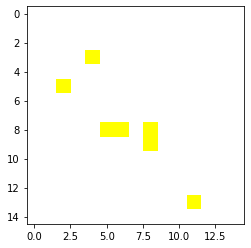

In [5]:
plt.imshow(train_data_images[1])

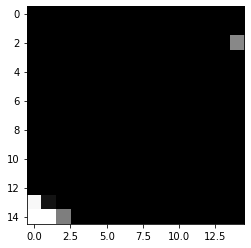

In [6]:
plt.imshow(train_target_images[1], cmap='gray')

In [7]:
train_data[0]

array([20.0741, 22.5011, 23.4386, 22.004 , 23.2944, 20.6491, 18.9241,
       24.5011, 26.0723, 23.427 , 21.4174, 25.1386, 22.277 , 24.0645,
       26.9944, 19.2203, 22.3607, 22.004 , 20.8616, 20.0741, 20.7895,
       23.4328, 22.2165, 23.7136, 23.7136, 26.0723, 24.2828, 22.852 ,
       24.4953, 25.7819, 21.2165, 22.577 , 20.9337, 21.7915, 21.9357,
       22.8636, 22.2203, 23.1482, 24.7194, 23.5732, 22.7136, 25.1482,
       24.0703, 24.9982, 22.6395, 22.7194, 22.7174, 22.8636, 23.0799,
       22.5049, 21.0761, 22.004 , 19.3587, 20.7895, 24.2886, 22.002 ,
       22.1424, 22.8578, 23.7174, 22.0703,  7.423 ,  7.2047,  7.0643,
        5.7835,  7.7797,  6.996 ,  8.5672,  4.7056,  7.0643,  8.4893,
        7.3489,  5.2027,  9.7076,  9.4913,  4.8498,  3.4931,  3.2748,
        3.7056,  2.7777,  2.6335,  2.8498,  3.273 ,  4.2768,  2.4855,
        5.2748,  2.7056,  3.0585,  3.9181,  5.5614,  4.9902,  3.9277,
        3.0623,  2.5652,  3.0661,  2.7056,  2.7777,  4.1344,  3.9181,
        3.3469,  4.2

In [8]:
train_data[1].shape

(225,)

In [9]:
train_data.shape

(917504, 225)

In [10]:
# np.stack(np.asarray(train_data), axis=1)[0].shape

In [11]:
classifier = init_knn_classifier(train_data, train_target)

In [12]:
j = 3000
predictions = classifier.predict(test_data[0:j])

In [13]:


tp, fp, fn, tn = 0, 0, 0, 0
for pred, targ in zip(predictions, test_target[:j]):
    if pred:
        if targ:
            tp += 1
        else:
            fp += 1
    else:
        if targ:
            fn += 1
        else:
            tn += 1

accuracy = (tp + tn) / (tn + fn + tp + fp)
sensitivity = tp / (tp + fn)
specificity = tn / (fp + tn)
geometric = float(gmean([sensitivity, specificity]))

stats = [accuracy, sensitivity, specificity, geometric]

stat_names = ['Accuracy', 'Sensitivity', 'Specificity', 'Geometric']
for i, name in enumerate(stat_names):
    print(f"{name}: {stats[i]}")

Accuracy: 0.951
Sensitivity: 0.5784313725490197
Specificity: 0.9933184855233853
Geometric: 0.7580016985202641


1.0


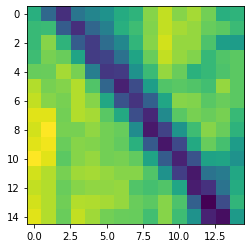

In [14]:
j, s = 0, 0
shift = 33
while predictions[j] != 1 or s < shift:
    j += 1
    s += 1

img = test_data[j]
m = np.sqrt(img.size).astype('int32')
img = img.reshape((m, m))
print(predictions[j])
plt.imshow(img)

Próba utworzenia maski

In [31]:
i = 13
input_img = np.asarray(load_image(get_image_paths(data_dir)[i]))
input_slices = get_input_features(data_images[256*256*(i-1):256*256*i])
target_img = np.asarray(load_image(get_image_paths(target_dir)[i]))

predicted_vector = classifier.predict(input_slices)

In [32]:
np.sum(predicted_vector)

5471.0

In [33]:
predicted_vector.shape

(65536,)

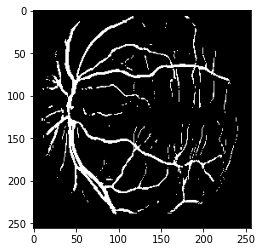

In [34]:
m = 256
predicted_image = np.zeros((m, m))

i = 0
# for x in range(m - slice_size + 1):
#     for y in range(m - slice_size + 1):
#         predicted_image[x, y] = predicted_vector[i]
#         i += 1

for x in range(m):
    for y in range(m):
        predicted_image[x, y] = predicted_vector[i]
        i += 1
plt.imshow(predicted_image, cmap="gray")

Opis podejścia